### KNN Algorithm: Good or Bad Wine Classification
#### I use the wine dataset, and the score of quality is more than 6 called Good Wine. 
#### This is a binary classification project
#### Finally, When K is 5,6 the accuracy is 100%

In [28]:
import io
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!

from sklearn import metrics
#load the data
data = pd.read_csv('winedata/winequality-red.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [30]:
data.shape

(1599, 12)

In [31]:
data["GoodWine"] = data.quality.apply(lambda x: 1 if x >=6 else 0)
#using normalization can improve the correct accuracy rate significantly.
def normalize(df):
    return (df - df.mean()) / (df.max() - df.min())
#data normalization
wine_normalized = data.iloc[:,1:12].apply(normalize)
wine_normalized.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205
1,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844,-0.127205
2,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844,-0.127205
3,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844,0.072795
4,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205


In [32]:
X = wine_normalized
#setting target
y = data.GoodWine

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

In [34]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

In [35]:
from numpy import *
import os
import math
            
def Euclidean(vec1, vec2):
   # 将两个向量转化为array
    npvec1, npvec2 = array(vec1),array(vec2)
   # 计算每个维度上差值平方根之和
    return math.sqrt(((npvec1-npvec2)**2).sum())
def DisVector(InX,DataSet):
    Dis = []    #记录距离
    Count = 0
    #计算待分类数据和训练集和中所有数据的距离
    for i in DataSet:
        #print(i)
        Dis.insert(Count,Euclidean(InX,i))
        Count = Count +1
    return Dis




In [46]:
def Classify1(InX,DataSet,Labels,k):
    global MaxIndex
    best_k = k
    Distance = DisVector(InX,DataSet)
    classCount = {}
    sortedDistIndices = argsort(Distance)
    for i in range(best_k):
       
        voteLabel = Labels[sortedDistIndices[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    
   
    maxCount = 0
    for key, value               in classCount.items():
        if value > maxCount:
            maxCount = value
            MaxIndex = key
 
    return MaxIndex





In [48]:
def k_acc(X_test,X_train,y_train,k):
    pred = []
    for i in range(len(X_test)):
        pred.append(Classify1(X_test.values[i],X_train.values,y_train.values,k))

    score =1-abs((y_test.values-pred).sum()/(len(y_test.values)))
    return score

1
acc：99.38%
2
acc：99.38%
3
acc：99.69%
4
acc：99.69%
5
acc：100.0%
6
acc：100.0%
7
acc：99.69%
8
acc：100.0%
9
acc：100.0%


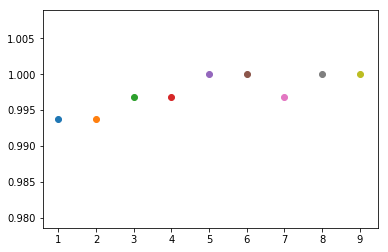

In [53]:
for i in range(1,10):
    print(i)
    b = i
    acc = k_acc(X_test,X_train,y_train,b)
    print("acc：{}%".format(round(acc*100, 2)))
    plt.scatter(i,acc)